# Unemployment Analysis

<p>The COVID-19 pandemic has significantly increased unemployment rates across many countries. As social restrictions and lockdowns were implemented to curb the spread of the virus, numerous businesses faced declining revenues, with some forced to shut down entirely. Sectors such as tourism, hospitality, retail, and transportation were among the hardest hit, leading to millions of workers losing their jobs. Informal workers, who rely on daily earnings, were also severely affected due to the slowdown in economic activities. </p>

<p>
Moreover, the pandemic accelerated structural changes in the labor market. Many companies shifted toward digitalization and automation to reduce dependence on human labor, creating a higher risk of unemployment for low-skilled workers. As this transformation continues, the demand for digital skills is rising, and those unable to adapt may find themselves increasingly marginalized in the post-pandemic job market.</p>

## Data Undertanding

This dataset contains the unemployment rate of all the states in India

Region = states in India <br>
Date = date which the unemployment rate observed<br>
Frequency = measuring frequency (Monthly)<br>
Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India<br>
Estimated Employed = percentage of people employed<br>
Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of people actively participating in the labour force by the
total number of people eligible to participate in the labor force
force

## Import Library


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Load Data


In [2]:
df = pd.read_csv('Unemployment in India.csv')

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Assesing Data

In [5]:
print('Rows Dataset : ',df.shape[0])
print('Columns Dataset : ',df.shape[1])

Rows Dataset :  768
Columns Dataset :  7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [7]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [8]:
print(df.isna().sum())
print('Sum of Missing Values :',df.isna().sum().sum())

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64
Sum of Missing Values : 196


In [9]:
print('Data Duplicated :',df.duplicated().sum())

Data Duplicated : 27


## Cleaning Data

In [10]:
# Rename Columns
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [11]:
df.rename(columns={
    ' Date': 'Date',
    ' Frequency': 'Freq',
    ' Estimated Unemployment Rate (%)': 'Unemployment Rate',
    ' Estimated Employed': 'Employed',
    ' Estimated Labour Participation Rate (%)': 'Labour Participation Rate',
    'Area': 'Area'
}, inplace=True)

In [12]:
# Handling Missing Values
df.isna().sum()

,0
Region,28
Date,28
Freq,28
Unemployment Rate,28
Employed,28
Labour Participation Rate,28
Area,28


In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

,0
Region,0
Date,0
Freq,0
Unemployment Rate,0
Employed,0
Labour Participation Rate,0
Area,0


In [15]:
# Change Data types
df['Date']= pd.to_datetime(df['Date'])

<ipython-input-15-1d31baf84f9c>:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']= pd.to_datetime(df['Date'])


In [16]:
df.dtypes

,0
Region,object
Date,datetime64[ns]
Freq,object
Unemployment Rate,float64
Employed,float64
Labour Participation Rate,float64
Area,object


In [17]:
# Drop Duplicated
df.drop_duplicates(inplace=True)

In [18]:
print('Rows Dataset : ',df.shape[0])
print('Columns Dataset : ',df.shape[1])

Rows Dataset :  740
Columns Dataset :  7


## EDA


**Explore Dataset**

In [19]:
df.head()

,Region,Date,Freq,Unemployment Rate,Employed,Labour Participation Rate,Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [20]:
# Fuction sum of Unemployment
def hitung_pengangguran(employed, unemployment_rate):
    total_angkatan_kerja = employed / (1 - unemployment_rate)
    pengangguran = total_angkatan_kerja - employed
    return round(pengangguran)

df['Unemployment'] = df.apply(lambda row: hitung_pengangguran(row['Employed'], row['Unemployment Rate']/100), axis=1)

In [21]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [22]:
df.head()

,Region,Date,Freq,Unemployment Rate,Employed,Labour Participation Rate,Area,Unemployment,Year,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,454560,2019,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,369834,2019,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,470911,2019,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,421892,2019,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,668222,2019,9


In [23]:
# Top 10 Unemployment from Region
top_unemployment = df.groupby('Region')['Unemployment'].sum().sort_values(ascending=False).head(10)
top_unemployment

,Unemployment
Region,
Uttar Pradesh,101117316
Bihar,72627686
Maharashtra,42769846
West Bengal,40399719
Rajasthan,40304173
Haryana,35066725
Tamil Nadu,28002009
Jharkhand,26981751
Karnataka,22652019


In [24]:
area_unemployment = df.groupby('Area')['Unemployment'].sum().sort_values(ascending=False)
area_unemployment

,Unemployment
Area,
Rural,377827645
Urban,210396432


In [25]:
year_unemployment = df.groupby('Year')['Unemployment'].sum()
year_unemployment

,Unemployment
Year,
2019,261244064
2020,326980013


In [26]:
monthly_unemployment = df.groupby(['Year', 'Month'])['Unemployment'].sum()
monthly_unemployment

Year  Month
2019  5        30294222
      6        33980930
      7        31797634
      8        35129547
      9        30644361
      10       35407586
      11       31252074
      12       32737710
2020  1        31737361
      2        33986836
      3        37128143
      4        85815286
      5        92457950
      6        45854437
Name: Unemployment, dtype: int64

## Data Visualization

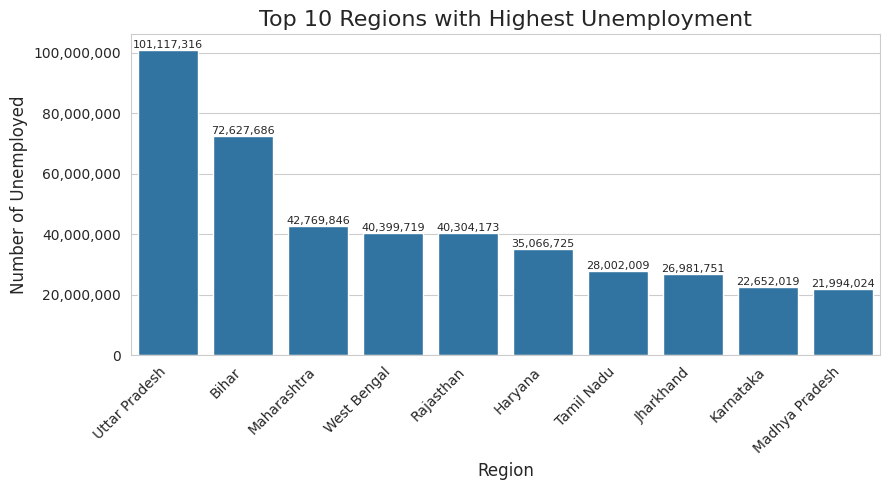

In [27]:
# Set style seaborn
sns.set_style("whitegrid")

# Membuat plot
plt.figure(figsize=(9, 5))
bars = sns.barplot(x=top_unemployment.index, y=top_unemployment.values)

plt.title('Top 10 Regions with Highest Unemployment', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Unemployed', fontsize=12)

# Rotasi label sumbu x
plt.xticks(rotation=45, ha='right')

# Format y-axis untuk menampilkan angka dalam format yang lebih mudah dibaca
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Menambahkan label di atas setiap bar
for i, v in enumerate(top_unemployment.values):
    bars.text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=8)

# Mengatur layout agar semua elemen terlihat
plt.tight_layout()

# Menampilkan plot
plt.show()

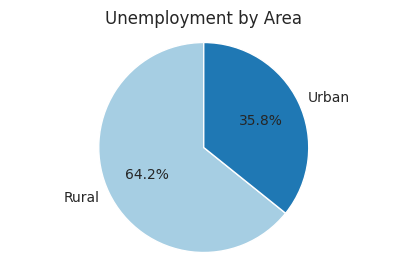

In [28]:
plt.figure(figsize=(5, 3))
plt.pie(area_unemployment.values, labels=area_unemployment.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Unemployment by Area')
plt.axis('equal')
plt.show()

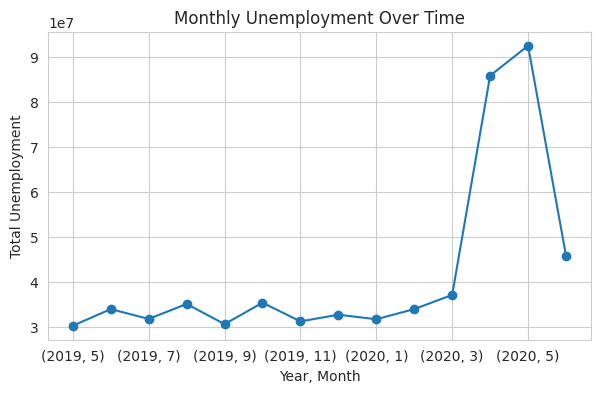

In [32]:
plt.figure(figsize=(7, 4))
monthly_unemployment.plot(kind='line', marker='o')
plt.title('Monthly Unemployment Over Time')
plt.xlabel('Year, Month')
plt.ylabel('Total Unemployment')
plt.grid(True)
plt.show()